Adapted from: https://github.com/karpathy/micrograd/blob/master/demo.ipynb

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

from micrograd.engine import Value
from micrograd.nn import MultiLayerPerceptron
from sklearn.datasets import make_moons, make_blobs
from sklearn.utils.extmath import softmax

np.random.seed(1337)
random.seed(1337)

## Data

In [10]:
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1  # make y be -1 or 1

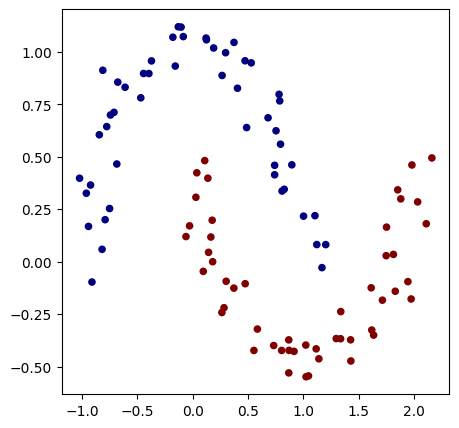

In [11]:
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")


## Model

In [12]:
model = MultiLayerPerceptron(2, [16, 16, 1])  # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2), Neuron+relu(2)], Layer of [Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16), Neuron+relu(16)], Layer of [Neuron(16)]]
number of parameters 337


## Loss

In [13]:
# loss function
def svg_loss(batch_size=None):
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

## Training

In [14]:
# params
learning_rate_scldr = lambda k:  1.0 - 0.9*k/100
loss = svg_loss
num_steps = 100

In [15]:
total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0.0) 0.5


In [16]:
# optimization
for k in range(1, num_steps+1):
    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()
    
    learning_rate = learning_rate_scldr(k)

    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc * 100}%")

step 1 loss 0.8958441028683222, accuracy 50.0%
step 2 loss 1.7081791363694836, accuracy 81.0%
step 3 loss 0.7197595166828699, accuracy 77.0%
step 4 loss 0.7807083917451118, accuracy 82.0%
step 5 loss 0.37108317965547233, accuracy 84.0%
step 6 loss 0.3141509933044865, accuracy 87.0%
step 7 loss 0.2821573926584284, accuracy 89.0%
step 8 loss 0.26485486075707376, accuracy 91.0%
step 9 loss 0.2452222695491425, accuracy 91.0%
step 10 loss 0.22564612624378885, accuracy 92.0%
step 11 loss 0.221792571854369, accuracy 92.0%
step 12 loss 0.2338665992641492, accuracy 91.0%
step 13 loss 0.2650014003367524, accuracy 93.0%
step 14 loss 0.2299438887318603, accuracy 91.0%
step 15 loss 0.23419799232636565, accuracy 93.0%
step 16 loss 0.17666007028216657, accuracy 93.0%
step 17 loss 0.18629462522884757, accuracy 95.0%
step 18 loss 0.23029407964574908, accuracy 89.0%
step 19 loss 0.2642521425588189, accuracy 90.0%
step 20 loss 0.1398885775892443, accuracy 94.0%
step 21 loss 0.12065739051065423, accuracy 

## Visualize Decision Boundary

(-1.548639298268643, 1.951360701731357)

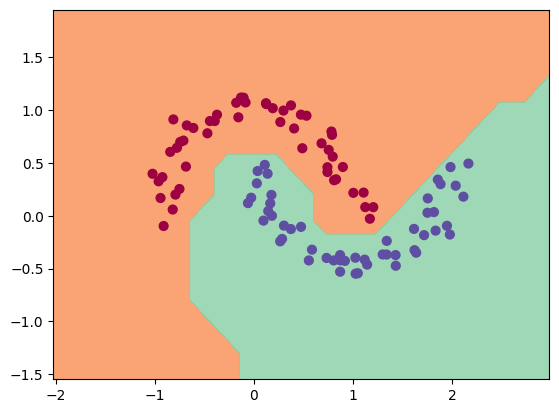

In [17]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())